TITLE

Intro: When did we lose creativity? That fearless joy of building something out of nothing, driven not by rules but by imagination? Minecraft was the first game I ever played, and it captured that feeling perfectly—the sense of infinite possibility, where blocks became castles, caves became mysteries, and the only limit was what you could dream up. Years later, I’ve found a surprisingly similar feeling in coding. Though I’m still learning, coding has rekindled that spark of creativity through the logic of making, breaking, and reshaping digital worlds. This project focuses on web scraping and analyzing mob drop from minewraft wiki. MThis project scrapes the Minecraft Wiki to analyze mob drops—the items creatures leave behind when defeated. My goal is twofold:

Technical: Can I extract, clean, and visualize this data to uncover trends? (Which mobs are the most "valuable"? Do drop rates follow predictable distributions?)
Philosophical: Can data analysis feel as creative as building a castle in Survival mode?

By treating the wiki as a "digital biome," I hope to show how coding can be both analytical and imaginative—a tool for discovery, just like a trusty diamond pickaxe.

In [22]:
from IPython.display import Audio
import os

Audio("/Users/Jay/Desktop/chickenlava.mp3")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('seaborn')

Loading the Data

I scraped three datasets from the Minecraft Wiki:
-Mob drop from passive
-neutral
-hostile

Let's load and inspect the data

/var/folders/sv/g935xvm15h94cpw7qwgcs82c0000gn/T/ipykernel_59156/3305038577.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


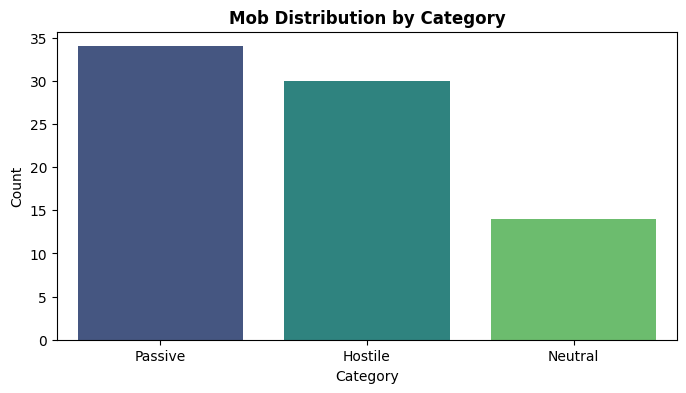

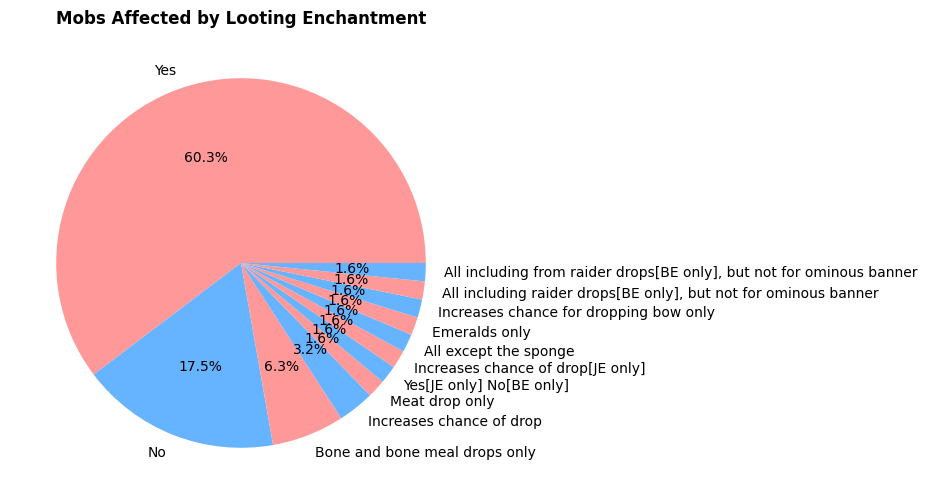

/var/folders/sv/g935xvm15h94cpw7qwgcs82c0000gn/T/ipykernel_59156/3305038577.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


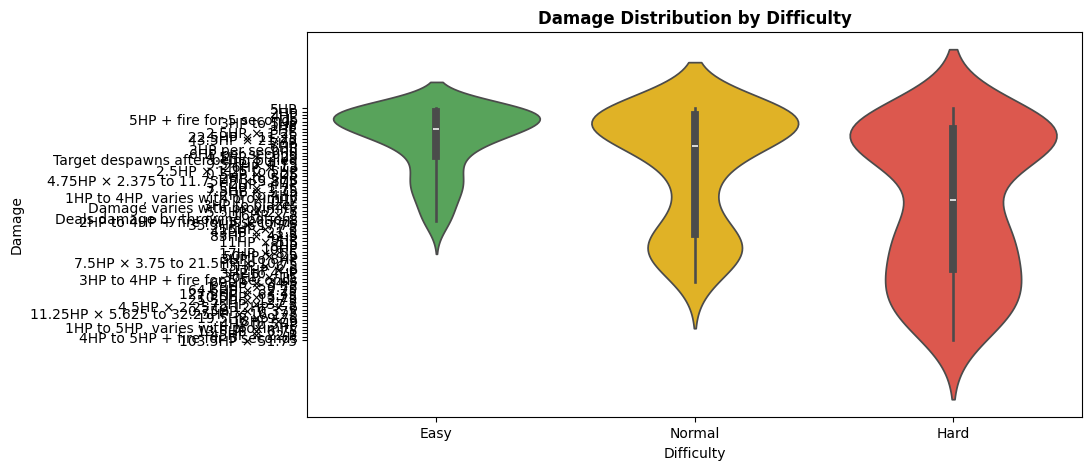

Status effect counts: {False: 80, True: 25}


/var/folders/sv/g935xvm15h94cpw7qwgcs82c0000gn/T/ipykernel_59156/3305038577.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["No Effect", "Has Effect"], y=status_effect_counts.values,


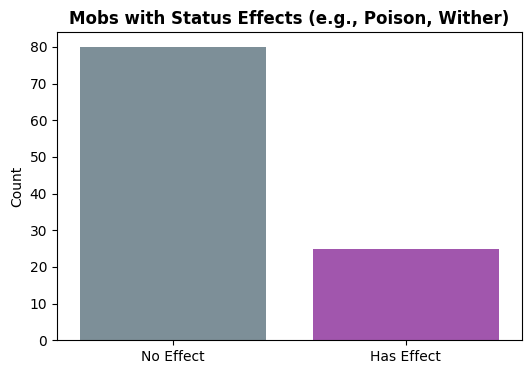

Skipping label for mob axolotl: invalid Difficulty Hard or Exp
Skipping label for mob bee: invalid Difficulty Hard or Exp
Skipping label for mob cat: invalid Difficulty Hard or Exp
Skipping label for mob dolphin: invalid Difficulty Hard or Exp
Skipping label for mob drowned: invalid Difficulty Hard or Exp
Skipping label for mob enderman: invalid Difficulty Hard or Exp
Skipping label for mob endermite: invalid Difficulty Hard or Exp
Skipping label for mob fox: invalid Difficulty Hard or Exp
Skipping label for mob frog: invalid Difficulty Hard or Exp
Skipping label for mob giant‌: invalid Difficulty Hard or Exp
Skipping label for mob goat: invalid Difficulty Hard or Exp
Skipping label for mob iron golem: invalid Difficulty Hard or Exp
Skipping label for mob ocelot: invalid Difficulty Hard or Exp
Skipping label for mob panda: invalid Difficulty Hard or Exp
Skipping label for mob polar bear: invalid Difficulty Hard or Exp
Skipping label for mob silverfish: invalid Difficulty Hard or Exp
Sk

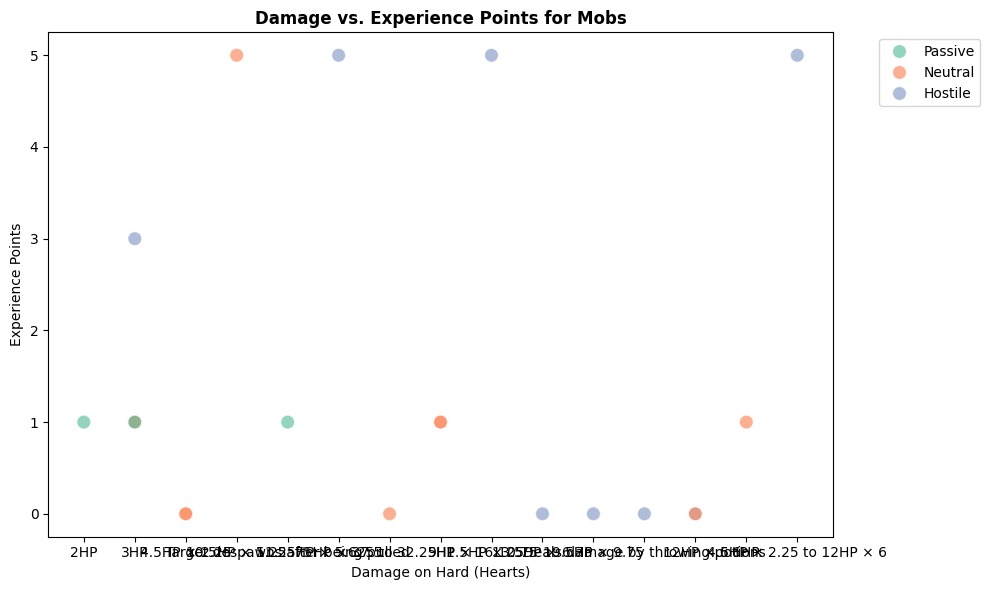

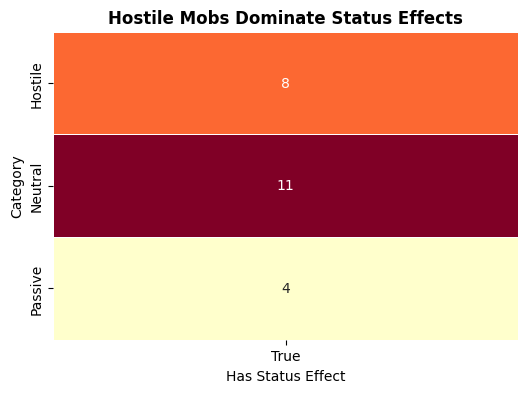

Feature importance: {'Difficulty Hard': 0.6564199354679393, 'Category': 0.2010127844534454, 'Status effect(s) Status effect(s)': 0.07465039701400014, 'Affected by the Looting enchantment': 0.06791688306461523}


/var/folders/sv/g935xvm15h94cpw7qwgcs82c0000gn/T/ipykernel_59156/3305038577.py:206: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf.feature_importances_, y=X.columns, palette="viridis")


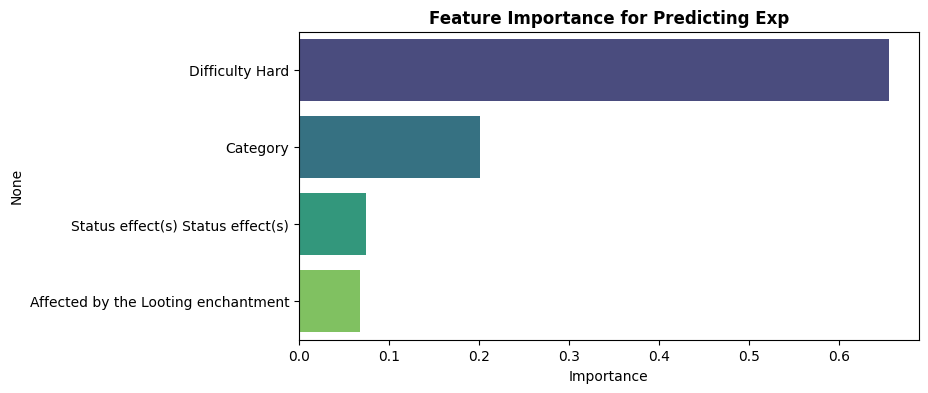

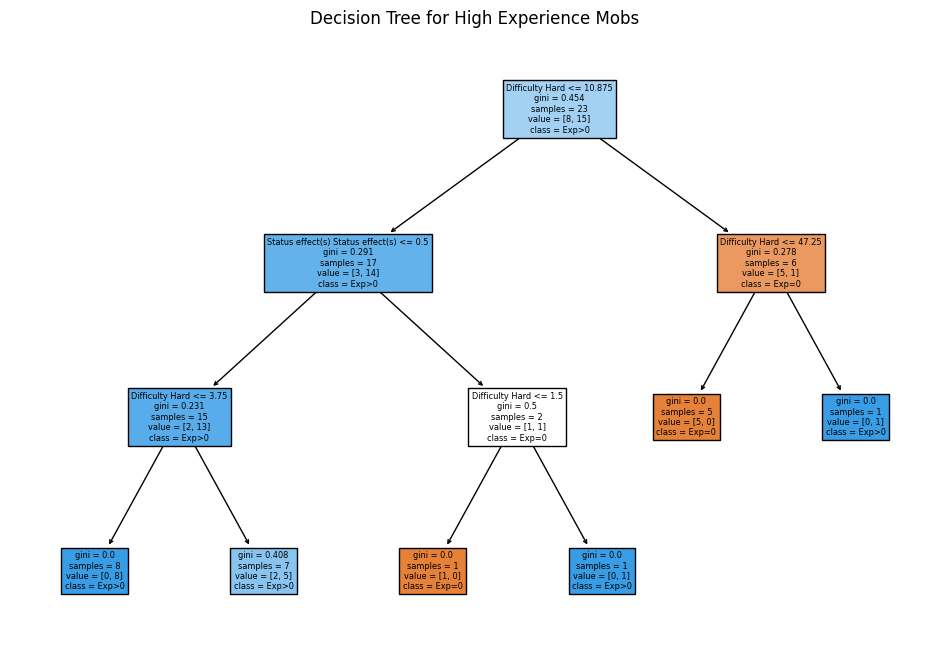

Coefficients: {'Difficulty Hard': 0.02119388606590224, 'Status effect(s) Status effect(s)': -1.6555857830001157, 'Category_Neutral': -1.3175860408002664, 'Category_Passive': -1.364532805069164}
Intercept: 2.3221450329373576


In [33]:
import pandas as pd

# Load CSVs
passive_df = pd.read_csv("passive_mobs.csv")
neutral_df = pd.read_csv("neutral_mobs.csv")
hostile_df = pd.read_csv("hostile_mobs.csv")
damage_df = pd.read_csv("mob_damage.csv")


# Add a column for category
passive_df["Category"] = "Passive"
neutral_df["Category"] = "Neutral"
hostile_df["Category"] = "Hostile"

# Combine all mob drop data
drops_df = pd.concat([passive_df, neutral_df, hostile_df], ignore_index=True)

# Standardize mob names
drops_df["Mob"] = drops_df["Mob"].str.strip().str.lower()
damage_df["Mob Mob"] = damage_df["Mob Mob"].str.strip().str.lower()

# Merge, using Difficulty Normal as Damage to avoid future KeyError
combined_df = pd.merge(
    drops_df, 
    damage_df.rename(columns={
        "Mob Mob": "Mob",
        "Difficulty Normal": "Damage",  # Use Normal as default Damage
        "Status effect(s) Status effect(s)": "Status_Effect"  # Rename for consistency in combined_df
    }),
    on="Mob", 
    how="inner"
)
##
import seaborn as sns
import matplotlib.pyplot as plt

# Count mobs per category
category_counts = drops_df["Category"].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Mob Distribution by Category", fontweight="bold")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# Looting enchantment pie chart
looting_counts = drops_df["Affected by the Looting enchantment"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(looting_counts, labels=looting_counts.index, 
        autopct="%1.1f%%", colors=["#ff9999", "#66b3ff"])
plt.title("Mobs Affected by Looting Enchantment", fontweight="bold")
plt.show()


# Damage distribution by difficulty
# Reshape damage_df to have one Difficulty and one Damage column
melted_damage_df = pd.melt(
    damage_df,
    id_vars=["Mob Mob"],  # Keep other columns as identifiers
    value_vars=["Difficulty Easy", "Difficulty Normal", "Difficulty Hard"],  # Columns to melt
    var_name="Difficulty",  # New column for difficulty names
    value_name="Damage"  # New column for damage values
)

# Clean up Difficulty column to show just "Easy", "Normal", "Hard"
melted_damage_df["Difficulty"] = melted_damage_df["Difficulty"].replace({
    "Difficulty Easy": "Easy",
    "Difficulty Normal": "Normal",
    "Difficulty Hard": "Hard"
})

plt.figure(figsize=(10, 5))
sns.violinplot(
    data=melted_damage_df,
    x="Difficulty",
    y="Damage",
    palette=["#4CAF50", "#FFC107", "#F44336"],
    order=["Easy", "Normal", "Hard"]  # Ensure consistent order
)
plt.title("Damage Distribution by Difficulty", fontweight="bold")
plt.show()


# Status effects bar plot
status_effect_counts = (damage_df["Status effect(s) Status effect(s)"] != "No").value_counts()
print("Status effect counts:", status_effect_counts.to_dict())  # Debug output

# Ensure both True and False are present
status_effect_counts = status_effect_counts.reindex([False, True], fill_value=0)

plt.figure(figsize=(6, 4))
sns.barplot(x=["No Effect", "Has Effect"], y=status_effect_counts.values, 
            palette=["#78909C", "#AB47BC"])
plt.title("Mobs with Status Effects (e.g., Poison, Wither)", fontweight="bold")
plt.ylabel("Count")
plt.show()

# Function to clean Experience (based on your old code)
def clean_exp(x):
    if pd.isna(x) or str(x).strip() in ["0", "", "None"]:
        return 0.0
    try:
        # Split on en dash or hyphen
        return float(str(x).split("–")[0].split("-")[0])
    except:
        return 0.0
    
# Merge damage and drops data
merged_df = pd.merge(
    damage_df[["Mob Mob", "Difficulty Hard", "Status effect(s) Status effect(s)"]],
    drops_df[["Mob", "Exp", "Category", "Affected by the Looting enchantment"]],
    left_on="Mob Mob",
    right_on="Mob",
    how="inner"
)

# Clean Experience column
merged_df["Exp"] = merged_df["Exp"].apply(clean_exp)

# Scatter plot
if len(merged_df) > 0:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x="Difficulty Hard",
        y="Exp",
        hue="Category",
        palette="Set2",
        data=merged_df,
        s=100,
        alpha=0.7
    )
    for i, row in merged_df.iterrows():
        try:
            x = float(row["Difficulty Hard"]) + 0.5
            y = float(row["Exp"])
            plt.text(x, y, row["Mob"], fontsize=9)
        except (ValueError, TypeError):
                        print(f"Skipping label for mob {row['Mob']}: invalid Difficulty Hard or Exp")
    plt.title("Damage vs. Experience Points for Mobs", fontweight="bold")
    plt.xlabel("Damage on Hard (Hearts)")
    plt.ylabel("Experience Points")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()
else:
    print("Skipping scatter plot: merged_df is empty.")


# Cross-tabulation
heatmap_data = pd.crosstab(combined_df["Category"], 
                          combined_df["Status_Effect"].notna())

plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrRd", 
            linewidths=0.5, cbar=False)
plt.title("Hostile Mobs Dominate Status Effects", fontweight="bold")
plt.xlabel("Has Status Effect")
plt.ylabel("Category")
plt.show()


#####NEW CHECK

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Random Forest to predict Exp
if len(merged_df) > 0:
    # Prepare data
    X = merged_df[["Difficulty Hard", "Category", "Status effect(s) Status effect(s)", "Affected by the Looting enchantment"]]
    X = X.copy()  # Avoid SettingWithCopyWarning
    # Enhanced cleaning for "Difficulty Hard" column
    def clean_difficulty(value):
        if isinstance(value, str):
            # Remove HP if present
            value = value.replace("HP", "")
            # Handle multiplication cases (take first value)
            if "×" in value:
                return float(value.split("×")[0].strip())
            # Handle other cases
            try:
                return float(value)
            except:
                return 0.0  # Default value if conversion fails
        return float(value)
    
    X["Difficulty Hard"] = X["Difficulty Hard"].apply(clean_difficulty)
    
    X["Category"] = LabelEncoder().fit_transform(X["Category"])
    X["Status effect(s) Status effect(s)"] = (X["Status effect(s) Status effect(s)"] != "No").astype(int)
    X["Affected by the Looting enchantment"] = X["Affected by the Looting enchantment"].map({"Yes": 1, "No": 0, "Unknown": 0}).fillna(0)
    y = merged_df["Exp"]

    # Fit random forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)


    # Feature importance
    print("Feature importance:", dict(zip(X.columns, rf.feature_importances_)))

    # Plot feature importance
    plt.figure(figsize=(8, 4))
    sns.barplot(x=rf.feature_importances_, y=X.columns, palette="viridis")
    plt.title("Feature Importance for Predicting Exp", fontweight="bold")
    plt.xlabel("Importance")
    plt.show()
else:
    print("Skipping random forest: merged_df is empty.")


#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

# Decision Tree Classifier
if len(merged_df) > 0:
    # Prepare data - use the same cleaning function as before
    X = merged_df[["Difficulty Hard", "Category", "Status effect(s) Status effect(s)"]]
    X = X.copy()
    
    # Apply the same cleaning we used for Random Forest
    def clean_difficulty(value):
        if isinstance(value, str):
            value = value.replace("HP", "")
            if "×" in value:
                return float(value.split("×")[0].strip())
            try:
                return float(value)
            except:
                return 0.0
        return float(value)
    
    X["Difficulty Hard"] = X["Difficulty Hard"].apply(clean_difficulty)
X["Category"] = LabelEncoder().fit_transform(X["Category"])
X["Status effect(s) Status effect(s)"] = (X["Status effect(s) Status effect(s)"] != "No").astype(int)
y = (merged_df["Exp"] > 0).astype(int)  # Binary: Exp > 0

# Fit decision tree
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X, y)

# Plot
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X.columns, class_names=["Exp=0", "Exp>0"], filled=True)
plt.title("Decision Tree for High Experience Mobs")
plt.show()

#Linear model
from sklearn.linear_model import LinearRegression

# Prepare data (with the same cleaning we used before)
X = merged_df[["Difficulty Hard", "Category", "Status effect(s) Status effect(s)"]]
X = pd.get_dummies(X, columns=["Category"], drop_first=True)
X["Status effect(s) Status effect(s)"] = (X["Status effect(s) Status effect(s)"] != "No").astype(int)

# Clean "Difficulty Hard" if needed
X["Difficulty Hard"] = X["Difficulty Hard"].apply(clean_difficulty)  # Use the same cleaning function

y = merged_df["Exp"]

# Fit and print coefficients
lr = LinearRegression()
lr.fit(X, y)
print("Coefficients:", dict(zip(X.columns, lr.coef_)))
print("Intercept:", lr.intercept_)

Conclusion 
Working on this project allowed me to bridge two things I care about: the creative spark I first discovered in Minecraft, and the growing curiosity I have for coding and data analysis.
What I found, both in the data and in the process of working with it, is that creativity can take many forms—even in something as seemingly technical as web scraping. Just like placing blocks in the game, writing code is a way of building something new. And just like mining in Minecraft, sometimes you dig for hours, only to strike something interesting when you least expect it.

This project began as a technical challenge but ended as a reminder: creativity thrives in constraints. Scraping the Minecraft Wiki felt like exploring a cave—I’d hit dead ends (404 errors), strike gold (clean datasets), and occasionally stumble upon a hidden lava pool (rate-limiting).

What did the data reveal?

The economic hierarchy of mobs (e.g., Endermen’s rare pearls vs. zombie flesh).
Statistical quirks (why do some drops defy probability?).
The sheer inefficiency of farming certain creatures—proof that even in a blocky universe, RNG reigns supreme.
But beyond the numbers, this project mirrored Minecraft’s core lesson: building something meaningful starts with curiosity. Whether placing blocks or writing loops, the joy is in the process. Next time I fight a Creeper, I’ll see more than an explosion—I’ll see a data point.

**Tips for players

*Want to try this analysis yourself? Check out the [GitHub repo](#) and run the code to explore

word count:....